# **AP157 Module C Lab Assignment**

## Module C2: Monte Carlo Methods

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: This lab assignment is based on work by Dr. Reyes in collaboration with Gene Belinario and Dr. Reginald Bernardo.

_Additional Reference_: MCMC Tutorial - https://prappleizer.github.io/Tutorials/MCMC/MCMC_Tutorial_Solution.html

### Student Information

_Full Name (Last Name, First Name)_: Chris Andrew Mendoza \
_Student No._: 2019-02636 \
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: May 23, 2024 (11:59 PM)

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Chris Andrew Mendoza

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/20
* Part 3 - []/30
* Part 4 - []/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In this lab assignment, you will generate constraints on cosmological parameters, the Hubble parameter H_0 and matter density Omega_m,0, from (synthetic) Hubble diagram data points from gravitational-wave (GW) sirens observed from 3 GW observatories: LIGO, LISA, and Einstein Telescope (ET).

The datasets are in the Google Drive "Datasets" Folder under "AP157_moduleC2" subfolder: https://drive.google.com/drive/folders/1UnK1AggxdsjtG3PoOcyXfpahBcWjOBzj?usp=drive_link.

Read in the 3 datasets from the CSV files: LIGO.csv, LISA.csv, ET.csv. The columns are redshift (z), luminosity distance (dL), and error in the luminosity distance (err). The distances are in units of Gpc (giga-parsecs).

Load the data into variable names: zLIGO, dLLIGO, errLIGO, zLISA, dLLISA, errLISA, and zET, dLET, and errET, respectively. Note that these variable names will be used in later parts of the code, so you have to use these names for compatibility.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!ls drive/My\ Drive

 1080652.jpg
'132 PROB SETS'
'151 Problem Set 1.pdf'
'165 Camera Setup'
'167 Activity 6: Color Science '
'170 Problem Set 1.pdf'
 184
 184_act_1
 191_Data
'191 Set A'
'191 - SET C EXPERIMENTS'
'192 Exp 2'
'192 Experiment 3'
'192 Experiment 3 (New Data)'
 192_SetB_Exp3.xlsx
'192 Set B - Experiment 3.gsheet'
 192_SetC_Experiment_1.gsheet
 20210709_190543.jpg
 20210709_190732.jpg
 20210713_010723.jpg
 20210724_020633.jpg
 20220503_174636.jpg
 20220503_175058.jpg
 20230126_102907.jpg
 20230205_111114.jpg
 20230205_185156.jpg
 20230227_170223.jpg
 20230227_170245.jpg
 20230303_110756.jpg
 20230315_170009.jpg
 20230403_153905.jpg
 20230403_154126.jpg
 20230403_154603.jpg
 20230606_233247.jpg
 20230607_173628.jpg
'20230719_204157 (1).jpg'
 20230719_204157.jpg
'20230719_204250 (1).jpg'
 20230719_204250.jpg
 20230719_205910.mp4
 20230719_210316.jpg
'20230719_210317 (1).jpg'
 20230719_210317.jpg
 20230719_211938.mp4
 20230719_213138.mp4
 20230719_214628.mp4
 20230719_223236.jpg
 20230725_201704.

In [3]:
file_path = "/content/drive/My Drive/App Physics 157/"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_LIGO = pd.read_csv(file_path + 'LIGO.csv')
data_LISA = pd.read_csv(file_path + 'LISA.csv')
data_ET = pd.read_csv(file_path + 'ET.csv')

In [5]:
# Extract the columns and assign to the specified variable names
zLIGO = data_LIGO['zLIGO']
dLLIGO = data_LIGO['dlLIGO']
errLIGO = data_LIGO['errLIGO']

zLISA = data_LISA['zLISA']
dLLISA = data_LISA['dlLISA']
errLISA = data_LISA['errLISA']

zET = data_ET['zET']
dLET = data_ET['dlET']
errET = data_ET['errET']

# Print the first few rows to verify the data
print(zLIGO.head(), dLLIGO.head(), errLIGO.head())
print(zLISA.head(), dLLISA.head(), errLISA.head())
print(zET.head(), dLET.head(), errET.head())

0    0.033270
1    0.106210
2    0.073820
3    0.047333
4    0.113966
Name: zLIGO, dtype: float64 0    0.101250
1    0.698621
2    0.338016
3    0.206075
4    0.401371
Name: dlLIGO, dtype: float64 0    0.026146
1    0.137968
2    0.067550
3    0.034506
4    0.159718
Name: errLIGO, dtype: float64
0    1.743477
1    6.271602
2    1.501697
3    4.802593
4    1.792854
Name: zLISA, dtype: float64 0    11.980274
1    53.889134
2    10.566134
3    41.118583
4    13.767077
Name: dlLISA, dtype: float64 0    0.546082
1    8.248728
2    0.389478
3    5.002363
4    0.581335
Name: errLISA, dtype: float64
0    0.943093
1    1.853726
2    1.050134
3    1.408336
4    1.332070
Name: zET, dtype: float64 0     5.611648
1     7.475383
2     7.436797
3    11.949542
4     9.204053
Name: dlET, dtype: float64 0    0.826565
1    3.542138
2    1.043646
3    1.967179
4    1.744991
Name: errET, dtype: float64


By the end of the lab assignment, you will generate constraints on the cosmological parameters H_0 and omega_m,0 for 3 samples: LIGO only, LIGO+LISA, and LIGO+LISA+ET (combined). You will generate a corner plot to visualize these constraints similar to the figure here: https://drive.google.com/file/d/18H7GPlox4ijS9qFbk1rHo-NW5N_Nsfer/view?usp=drive_link

#### PART 1 - Generate Hubble Diagram *(20 points)*

Make a Hubble diagram plot-- with luminosity distance (d_L) in the vertical axis and redshift (z) in the horizontal axis. Show the errors in d_L as error bars.

Plot GW sirens from the 3 observatories in the same plot and include a legend. Briefly describe the difference between the samples from the 3 observatories.

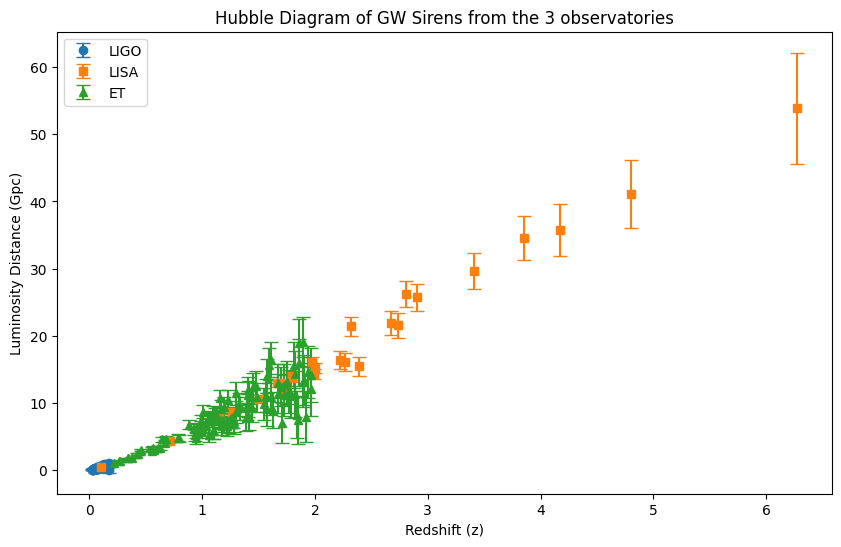

In [14]:
# Create the Hubble diagram plot
plt.figure(figsize=(10, 6))

# Plot LIGO data with error bars
plt.errorbar(zLIGO, dLLIGO, yerr=errLIGO, fmt='o', label='LIGO', capsize=5)

# Plot LISA data with error bars
plt.errorbar(zLISA, dLLISA, yerr=errLISA, fmt='s', label='LISA', capsize=5)

# Plot ET data with error bars
plt.errorbar(zET, dLET, yerr=errET, fmt='^', label='ET', capsize=5)

# Adding labels and title
plt.xlabel('Redshift (z)')
plt.ylabel('Luminosity Distance (Gpc)')
plt.title('Hubble Diagram of GW Sirens from the 3 observatories')
plt.legend()

# **DISCUSSION**

In the plot it is observed that the 3 observatories cover different ranges of GW sirens in terms of redshift and luminosity distance. LIGO is able to cover GW sirens of z < 1 with a shorter luminosity distance. ET on the other hand has wider range in terms of redshift compared to LIGO but it the points have a large degree of uncertainty especially in the region with large z and luminosity distance. Last but not the least, LISA exhibits the largest range for detecting GW sirens as it is shown to capture points with z values spanning fro 0.X to ~6. It is also able to capture the points with the largest luminosity distances. The plot above also has shown that the amount of redshift is directly proportional to the luminosity distance.


#### PART 2 - Define likelihood functions *(20 points)*

In this analysis, we will assume the cosmological model to be flat LambdaCDM universe. This is given by the `FlatLambdaCDM' model from the astropy.cosmology package. In particular, we use the model for the luminosity distance as a function of redshift, which is encoded in the luminosity_distance function.

Below, define the chi-square and likelihood function to be used for the LIGO only and the LIGO+LISA dataset. You are asked to define the analogous functions for the LIGO+LISA+ET dataset. Note that the likelihood for the combined dataset is simply the sum of the likelihoods for the individual datasets.




In [16]:
import numpy as np
from astropy.cosmology import FlatLambdaCDM

def chi2LIGO_lcdm(H0, Om0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)
    model = np.array(cosmo.luminosity_distance(zLIGO)/1000)
    dev = (model - np.array(dLLIGO))/np.array(errLIGO)
    chi2 = sum(dev**2)
    return chi2

def llikeLIGO_lcdm(H0, Om0):
    if (H0 < 0) or (Om0 < 0):
        return -np.inf
    else:
        return -0.5*chi2LIGO_lcdm(H0, Om0)

# LIGO + LISA
def chi2LISA_lcdm(H0, Om0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)
    model = np.array(cosmo.luminosity_distance(zLISA)/1000)
    dev = (model - np.array(dLLISA))/np.array(errLISA)
    chi2 = sum(dev**2)
    return chi2

def llikeLIGOLISA_lcdm(H0, Om0):
    if (H0 < 0) or (Om0 < 0):
        return -np.inf
    else:
        return -0.5*(chi2LIGO_lcdm(H0, Om0) + chi2LISA_lcdm(H0, Om0))

# LIGO + LISA + ET
def chi2ET_lcdm(H0, Om0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)
    model = np.array(cosmo.luminosity_distance(zET)/1000)
    dev = (model - np.array(dLET))/np.array(errET)
    chi2 = sum(dev**2)
    return chi2

def llikeLIGOLISAET_lcdm(H0, Om0):
    if (H0 < 0) or (Om0 < 0):
        return -np.inf
    else:
        return -0.5*(chi2LIGO_lcdm(H0, Om0) + chi2LISA_lcdm(H0, Om0) \
                     + chi2ET_lcdm(H0, Om0))

# **DISCUSSION**

The likelihood functions use the chi-square values to compute the log-likelihood. The log-likelihood functions are defined as:

log-likelihood = −0.5 × 𝜒2

This formulation ensures that the likelihood is maximized when the chi-square value is minimized, aligning with the principle of maximum likelihood estimation. The chi-square functions are essential for quantifying the agreement between the cosmological model and the observed data, forming the basis for the likelihood functions used in the MCMC analysis to constrain the cosmological parameters 𝐻_0 and Ω_𝑚.

#### PART 3 - Perform MCMC runs *(30 points)*

Use the emcee library to set up and perform MCMC runs for the 3 samples: LIGO only, LIGO+LISA, and LIGO+LISA+ET combined.

You can try the ff. parameters-- number of walkers (nwalkers) of 100 and number of iterations (niter) of 1,000 and number of burn-in samples (nburn) of 100.

Note that the number of dimensions (ndim) is the number of parameters, equal to 2.

For the methodology of stepping from one place of the grid to another, you can use:

    dres = [0.1, 0.003] # step size for H_0 and omega_m,0, respectively
    initial = np.array([70., 0.3])
    p0 = [initial + dres * np.random.randn(ndim) for i in range(nwalkers)]

For the 'lnprob' function equivalent, you can define (for example):

    def lnprob(x):
      '''params: H0, Om0 = x0, x1'''
      return llikeLIGOLISA_lcdm(x[0], x[1])

Also note that because in our definition of likelihood functions, the data is ``hard-coded'', you do not need to use the "args" keyword in the emcee.EnsembleSampler command.

In [17]:
pip install -U emcee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 863.3 kB/s eta 0:00:00


In [18]:
pip install -U multiprocess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00


In [19]:
pip install -U getdist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.0/826.0 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for getdist: filename=getdist-1.4.8-py3-none-any.whl size=810431 sha256=7700aa78f9cdb9f2843ed999149004e8fffce3cdac9c9d17d2077345d14c1097
  Stored in directory: /root/.cache/pip/wheels/ba/db/c3/b71b37200117c3b4c68b8bb14c9e27ed36006205fa25ba0c40
Successfully built getdist


In [20]:
### For LIGO ONLY ####

import emcee
from scipy.optimize import minimize
import time
import multiprocess
from multiprocess import Pool
from getdist import plots, MCSamples

ndim, nwalkers = 2, 6
nburn = 100
nmcmc = 5000

dres = [0.1, 0.003]
burnin = 100

resultsLIGO_lcdm = []
samplesLIGO_lcdm = {}

def loglike(x):
    '''params: H0, Om0 = x0, x1'''
    return llikeLIGO_lcdm(x[0], x[1])

def chimint(x):
    return -loglike(x)

print('searching the initial position ...')
rest = minimize(chimint, [70, 0.3], method = 'Nelder-Mead')
print('minimization 0.5*chi2', rest.x)
result = rest.x

# MCMC starts here
with Pool() as pool:
    start = time.time()
    sampler = emcee.EnsembleSampler(nwalkers, ndim, loglike, pool=pool)

    pos0 = [result + dres * np.random.randn(ndim) for i in range(nwalkers)]

    print("Running MCMC...")
    pos1 = sampler.run_mcmc(pos0, nburn, rstate0=np.random.get_state())
    sampler.reset()
    pos2 = pos1
    sampler.run_mcmc(pos2, nmcmc, rstate0=np.random.get_state(), progress=True)
    print("Done.")

    samps = sampler.chain[:, burnin:, :].reshape((-1, ndim))
    names = ["H0", "Om0"]
    labels = ["H_0", "\Omega_{m0}"]

    resultsLIGO_lcdm.append(samps)
    samplesLIGO_lcdm = MCSamples(samples=samps, names=names, labels=labels)

    H0_mcmc, Om0_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), \
                            zip(*np.percentile(samps, [16, 50, 84], axis=0)))
    print("""MCMC result:
             $H_0$       = {0[0]} + {0[1]} - {0[2]}
             $\Omega_m0$ = {1[0]} + {1[1]} - {1[2]}
          """.format(H0_mcmc, Om0_mcmc))

    print("Mean acceptance fraction:", np.mean(sampler.acceptance_fraction), time.time() - start)

searching the initial position ...
minimization 0.5*chi2 [68.93595678  0.66195196]
Running MCMC...


100%|██████████| 5000/5000 [02:44<00:00, 30.36it/s]


Done.
Removed no burn in
MCMC result:
             $H_0$       = 67.0024455851213 + 2.9279678316736977 - 3.567055604413909
             $\Omega_m0$ = 1.287127084622027 + 1.3923000019794678 - 0.829399645149866
          
Mean acceptance fraction: 0.6938 169.78199219703674


In [21]:
### For LIGO + LISA ###

ndim, nwalkers = 2, 6
nburn = 100
nmcmc = 5000

dres = [0.1, 0.003]
burnin = 100

resultsLIGOLISA_lcdm = []
samplesLIGOLISA_lcdm = {}

def loglike(x):
    '''params: H0, Om0 = x0, x1'''
    return llikeLIGOLISA_lcdm(x[0], x[1])

def chimint(x):
    return -loglike(x)

print('searching the initial position ...')
rest = minimize(chimint, [70, 0.3], method = 'Nelder-Mead')
print('minimization 0.5*chi2', rest.x)
result = rest.x

# MCMC starts here
with Pool() as pool:
    start = time.time()
    sampler = emcee.EnsembleSampler(nwalkers, ndim, loglike, pool=pool)

    pos0 = [result + dres * np.random.randn(ndim) for i in range(nwalkers)]

    print("Running MCMC...")
    pos1 = sampler.run_mcmc(pos0, nburn, rstate0=np.random.get_state())
    sampler.reset()
    pos2 = pos1
    sampler.run_mcmc(pos2, nmcmc, rstate0=np.random.get_state(), progress=True)
    print("Done.")

    samps = sampler.chain[:, burnin:, :].reshape((-1, ndim))
    names = ["H0", "Om0"]
    labels = ["H_0", "\Omega_{m0}"]

    resultsLIGOLISA_lcdm.append(samps)
    samplesLIGOLISA_lcdm = MCSamples(samples=samps, names=names, labels=labels)

    H0_mcmc, Om0_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), \
                            zip(*np.percentile(samps, [16, 50, 84], axis=0)))
    print("""MCMC result:
             $H_0$       = {0[0]} + {0[1]} - {0[2]}
             $\Omega_m0$ = {1[0]} + {1[1]} - {1[2]}
          """.format(H0_mcmc, Om0_mcmc))

    print("Mean acceptance fraction:", np.mean(sampler.acceptance_fraction), time.time() - start)

searching the initial position ...
minimization 0.5*chi2 [70.14033617  0.31225774]
Running MCMC...


100%|██████████| 5000/5000 [04:07<00:00, 20.20it/s]

Done.
Removed no burn in
MCMC result:
             $H_0$       = 70.14985589737165 + 0.967810851517271 - 0.9983792593148593
             $\Omega_m0$ = 0.31217422819698937 + 0.024262859235287815 - 0.021446929207688648
          
Mean acceptance fraction: 0.7254999999999999 251.53540444374084


In [22]:
### For LIGO + LISA + ET ###

ndim, nwalkers = 2, 6
nburn = 100
nmcmc = 5000

dres = [0.1, 0.003]
burnin = 100

resultsLIGOLISAET_lcdm = []
samplesLIGOLISAET_lcdm = {}

def loglike(x):
    '''params: H0, Om0 = x0, x1'''
    return llikeLIGOLISAET_lcdm(x[0], x[1])

def chimint(x):
    return -loglike(x)

print('searching the initial position ...')
rest = minimize(chimint, [70, 0.3], method = 'Nelder-Mead')
print('minimization 0.5*chi2', rest.x)
result = rest.x

# MCMC starts here
with Pool() as pool:
    start = time.time()
    sampler = emcee.EnsembleSampler(nwalkers, ndim, loglike, pool=pool)

    pos0 = [result + dres * np.random.randn(ndim) for i in range(nwalkers)]

    print("Running MCMC...")
    pos1 = sampler.run_mcmc(pos0, nburn, rstate0=np.random.get_state())
    sampler.reset()
    pos2 = pos1
    sampler.run_mcmc(pos2, nmcmc, rstate0=np.random.get_state(), progress=True)
    print("Done.")

    samps = sampler.chain[:, burnin:, :].reshape((-1, ndim))
    names = ["H0", "Om0"]
    labels = ["H_0", "\Omega_{m0}"]

    resultsLIGOLISAET_lcdm.append(samps)
    samplesLIGOLISAET_lcdm = MCSamples(samples=samps, names=names, labels=labels)

    H0_mcmc, Om0_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), \
                            zip(*np.percentile(samps, [16, 50, 84], axis=0)))
    print("""MCMC result:
             $H_0$       = {0[0]} + {0[1]} - {0[2]}
             $\Omega_m0$ = {1[0]} + {1[1]} - {1[2]}
          """.format(H0_mcmc, Om0_mcmc))

    print("Mean acceptance fraction:", np.mean(sampler.acceptance_fraction), time.time() - start)

searching the initial position ...
minimization 0.5*chi2 [69.80399394  0.32096488]
Running MCMC...


100%|██████████| 5000/5000 [07:36<00:00, 10.96it/s]


Done.
Removed no burn in
MCMC result:
             $H_0$       = 69.81057717198189 + 0.7925034980903405 - 0.8356265105176561
             $\Omega_m0$ = 0.3209575580947854 + 0.022180563370344963 - 0.020789859555999157
          
Mean acceptance fraction: 0.7217666666666668 465.5397720336914


# **DISCUSSION**

The general methodology for conducting the MCMC runs for the datasets involves several key steps. First, the likelihood function for the cosmological parameters H_0 and Ω_𝑚 is defined based on the chi-square fit to the LIGO data. An initial optimization using the Nelder-Mead method is performed to find a good starting point for the MCMC, minimizing the negative log-likelihood. Then, an ensemble sampler from the emcee library is set up with a specified number of walkers and dimensions. The walkers are initialized around the optimized starting point with small random perturbations. Using parallel processing, the MCMC is run in two stages: a burn-in phase to allow the walkers to converge, followed by the main sampling phase to collect samples from the posterior distribution. The results are then summarized, including the estimated cosmological parameters and their uncertainties, as well as the mean acceptance fraction are reported to assess the quality of the sampling process.

It is discovered that all 3 MCMC runs for the calculation of the hubble constant, H_0, which measures the rate at which the universe is expanding to be in the range of 67 to ~70 km/s/Mpc. The values are quite near to each other thus, it is safe to assume we can get a precise measurement of the constant regardless which dataset we use. For the matter density on the other hand, there is a problem with the calculated value if we use the LIGO data only as the constant derived from it is ~1.3 which is way off from the other 2 calculated values which are at ~0.3. For the acceptance ratio, all 3 MCMC runs have values quite near to the other; it is to be noted though that the LIGO only run had the smallest ratio at around 0.69 while the other 2 were around 0.72. Note that a mean acceptance fraction between 0.2 and 0.5 is generally considered optimal. A high acceptance fraction (close to 1) may indicate that the step sizes are too small, leading to many small moves that don't explore the parameter space efficiently. A low acceptance fraction (close to 0) may suggest that the step sizes are too large, causing many proposals to be rejected because they fall in regions of low probability density.

#### PART 4 - Generate corner plot to visualize the constraints *(30 points)*

Overlay the results for the 3 samples for easy comparison. Your plot should resemble the figure here: https://drive.google.com/file/d/18H7GPlox4ijS9qFbk1rHo-NW5N_Nsfer/view?usp=drive_link

Briefly describe the difference between the constraints obtained from the different samples.

In [ ]:
g = plots.getSubplotPlotter()
g.triangle_plot([samplesLIGO_lcdm, samplesLIGOLISA_lcdm, samplesLIGOLISAET_lcdm], filled=True, \
                legend_labels=[r'LIGO', r'LIGO + LISA', r'LIGO + LISA + ET'], \
                contour_colors=['b', 'g', 'r'], \
                title_limit=0, \
                contour_ls=['-', '--', '-.'], contour_lws=1.2, legend_loc='upper right', \
                param_limits = {'H0': (60, 80), 'Om0': (0.2, 0.4)}, \
                markers = {'H0': 70, 'Om0': 0.284})
#plt.savefig('postlcdm_mcmc_x2.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# def cornerplt(sampleset):
#     figure = plt.figure()
#     colorlist = ["blue", "green", "red"]

#     for i, sample in enumerate(sampleset):
#         samples = sample.flatchain
#         corner.corner(
#             data=samples,
#             fig=figure,
#             labels=['$H_0$', '$\Omega_{m0}$'],
#             show_titles=True,
#             plot_datapoints=True,
#             color=colorlist[i],
#             range=[(60, 80), (0, 1)]
#         )

#     plt.show()

In [ ]:
# sampol = {**samplesLIGO_lcdm, **samplesLIGOLISA_lcdm, **samplesLIGOLISAET_lcdm}

# cornerplt(sampol)